In [47]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

In [3]:
np.random.seed(40)

In [5]:
X = np.random.rand(100, 1) - 0.5
y= 3* X[:, 0] **2 +0.05 * np.random.randn(100)

In [7]:
df = pd.DataFrame(X, y)

In [9]:
df.sample(5)

,0
-0.031234,-0.044290
0.064160,0.130024
0.049187,0.024253
0.499147,-0.422551
0.168774,0.197678


In [11]:
df.shape

(100, 1)

In [13]:
df['X'] = X.reshape(100)
df['y'] = y

In [19]:
df.sample(5)

,0,X,y
0.005294,0.019644,0.019644,0.005294
0.456786,0.422765,0.422765,0.456786
0.486997,-0.367655,-0.367655,0.486997
0.405159,0.404267,0.404267,0.405159
0.012655,-0.098304,-0.098304,0.012655


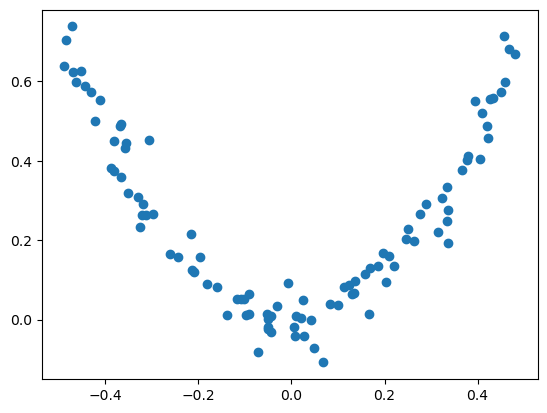

In [17]:
plt.scatter(X, y)

In [21]:
df['predict1'] = np.mean(df['y'])

In [23]:
df.sample(5)

,0,X,y,predict1
0.033205,-0.031757,-0.031757,0.033205,0.252702
-0.018410,-0.050095,-0.050095,-0.018410,0.252702
0.448889,-0.381799,-0.381799,0.448889,0.252702
0.009971,-0.043080,-0.043080,0.009971,0.252702
0.703686,-0.485425,-0.485425,0.703686,0.252702


In [25]:
df['residual1'] = df['y'] - df['predict1']

In [27]:
df.sample(5)

,0,X,y,predict1,residual1
0.012655,-0.098304,-0.098304,0.012655,0.252702,-0.240047
0.012322,-0.137704,-0.137704,0.012322,0.252702,-0.240381
0.623028,-0.468936,-0.468936,0.623028,0.252702,0.370326
0.033205,-0.031757,-0.031757,0.033205,0.252702,-0.219497
0.319281,-0.352247,-0.352247,0.319281,0.252702,0.066579


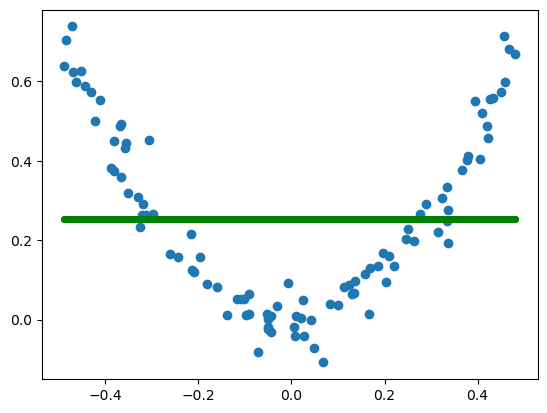

In [37]:
plt.scatter(X, y)
plt.plot(X, df['predict1'], color = 'green', linewidth = 5)

In [41]:
dtr1 = DecisionTreeRegressor(max_leaf_nodes=12)

In [45]:
dtr1.fit(X, df['residual1'])

DecisionTreeRegressor(max_leaf_nodes=12)

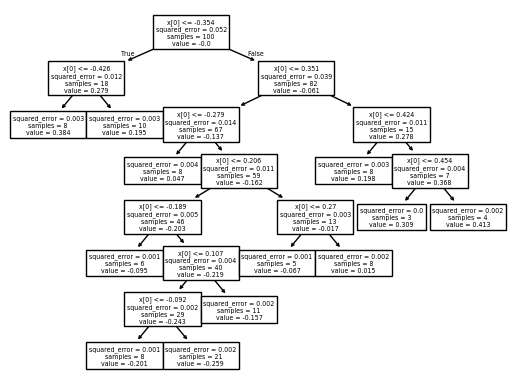

In [51]:
plot_tree(dtr1)
plt.show()

In [61]:
X_test = np.linspace(-0.5, 0.5, 100)
model_1 = 0.252702
model_2 = dtr1.predict(X_test.reshape(100, 1))
y_predict = model_1 + model_2 

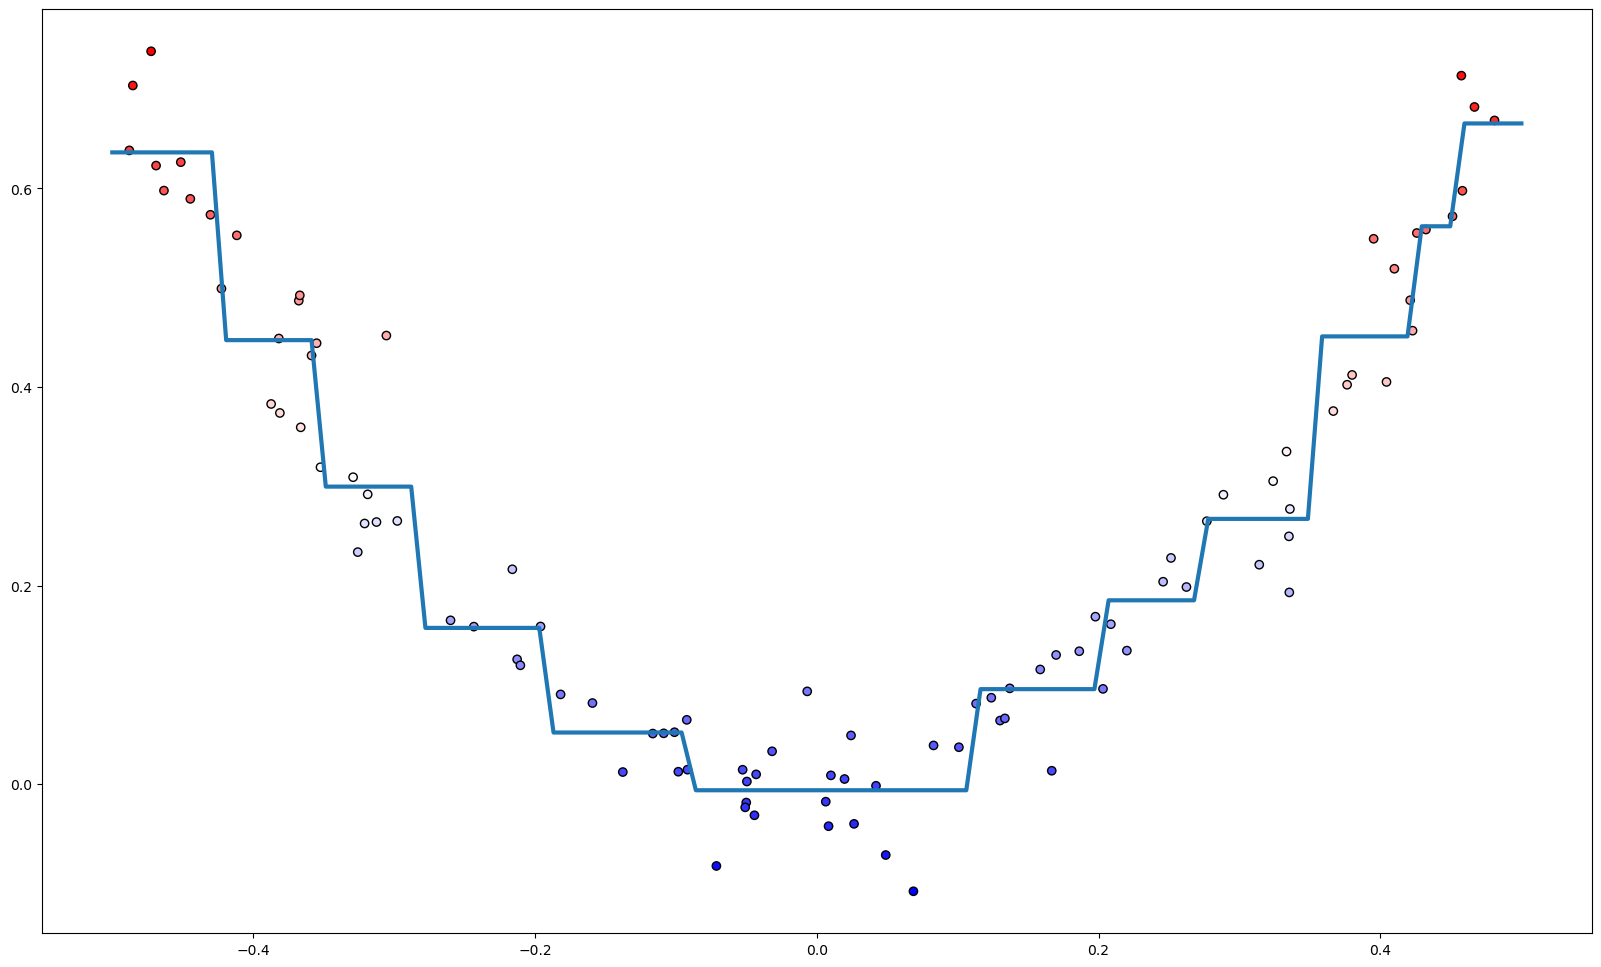

In [89]:
plt.figure(figsize= (20, 12))
plt.plot(X_test, y_predict, linewidth = 3)
plt.scatter(X, y, c=y, edgecolor = 'k', cmap = 'bwr')